# Task 4

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# df = pd.read_csv("threeBlobs.csv", header=None)
df = pd.read_csv('threeBlobs.csv', header=None).T
df.rename(columns = {0:'x_coord', 1:'y_coord'}, inplace = True)
df = np.array(df).transpose().copy()
df

array([[ 1.18281188e-01, -2.09307237e-01, -2.29381975e-01,
        -9.65952045e-02, -2.30461577e-01, -2.65976973e-02,
        -3.17074714e-01, -2.18391250e-01, -3.45947998e-01,
        -1.99835640e-01, -4.33124171e-01, -4.19366987e-02,
        -6.50861362e-02,  2.30029430e-01, -4.62071071e-01,
         1.15204008e-01, -1.57726083e-01, -2.19182695e-02,
        -7.29870422e-02, -2.77330957e-01, -2.66513577e-01,
         2.32319623e-01, -5.22246089e-01, -1.66477464e-01,
        -4.43328414e-01, -2.11282835e-01, -4.08391975e-02,
        -1.58829045e-01, -1.41604706e-01, -4.94058711e-01,
         5.55554071e-02, -3.34426656e-01, -1.53064598e-01,
         3.91384755e-01, -8.07081447e-03, -3.48715559e-01,
        -6.34252601e-01, -5.42403503e-01, -1.90845579e-01,
        -6.02990162e-02, -1.09007390e-01,  2.10560904e-01,
        -9.05889952e-03, -5.52502772e-01, -1.29637540e-01,
        -1.63003237e-01, -4.98437598e-02, -4.76292449e-01,
        -2.84072946e-01,  2.92399969e-02, -4.11999819e-0

In [3]:
import math
import random

def incremental_farthest_search(points, k):
    remaining_points = points.copy()
    solution_set = []
    index = np.argsort(np.linalg.norm(points - points.mean(0), axis=1))[-1].copy()
    solution_set.append(points[index])
    for _ in range(k-1):
        distances = [distance(p, solution_set[-1]) for p in remaining_points]
        for i, p in enumerate(remaining_points):
            for j, s in enumerate(solution_set):
                distances[i] = min(distances[i], distance(p, s))
        solution_set.append(remaining_points[distances.index(max(distances))])
        np.delete(remaining_points, distances.index(max(distances)))
    return np.array(solution_set)

def distance(A, B):
    return (abs(A - B)**2).sum()

In [4]:
def FW_update_Z(X, M, Z, tmax):
    e = np.eye(Z.shape[0])
    for t in range(tmax):
        Gz = 2 * (M.transpose() @ M @ Z - M.transpose() @ X)

        imin = np.argmin(Gz, axis=0)
        Z += 2 / (t + 2) * (e[:, imin] - Z)

    return Z


def FW_kMeans_Version1(X, k, Tmax):
    # Randomly generate k centroids
    # b = X.max(axis=1).reshape(X.shape[0], 1).copy()
    # m = np.random.random((X.shape[0], k))
    # a = X.min(axis=1).reshape(X.shape[0], 1).copy()
    # M = (b-a) * m + a

    M = incremental_farthest_search(X.transpose(), k).transpose()

    for T in range(Tmax):
        Z = 1/k*np.ones((k, X.shape[1]))

        Z = FW_update_Z(X, M, Z, 1)
        M = X@Z.transpose() @ np.linalg.inv(Z @ Z.transpose())

    return M, Z


k = 3
M, Z = FW_kMeans_Version1(df, k, 5)
Zdf = pd.DataFrame(Z)
Zdf

,0,1,2,3,4,5,6,7,8,9,...,165,166,167,168,169,170,171,172,173,174
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


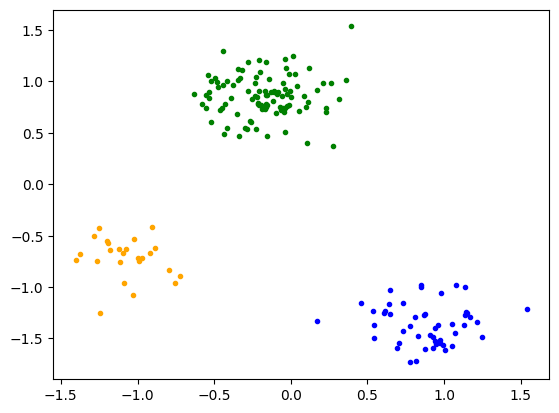

In [5]:
classes = (np.where(Zdf == 1.))
classes = classes[0][np.argsort(classes[1])]

clr = ['blue', 'green', 'orange']
for i in range(df.shape[1]):
    plt.plot(df[0][i], df[1][i], '.', color=clr[classes[i]])

In [6]:
incremental_farthest_search(df.transpose(), k).shape

(3, 2)

In [7]:
df2 = np.load("faceMatrix.npy")
df2.shape
dff = df2.transpose().reshape(df2.shape[1], int(df2.shape[0]**0.5), int(df2.shape[0]**0.5))

data = dff.reshape(2429, -1)


# for i in range(5000):
    # res = FW_kMeans_Version1(data, 16, 5)

k = 16
res = incremental_farthest_search(data, k)
res

array([[206, 224, 238, ..., 229, 228, 231],
       [ 59,  44,  32, ...,  58,  52,  29],
       [ 26,  33,  45, ...,  15,  18,  58],
       ...,
       [ 26,  54,  83, ..., 201, 177,  97],
       [ 93, 134, 173, ..., 123,  94,  53],
       [ 98, 119, 111, ...,  90,  78,  65]], dtype=uint8)

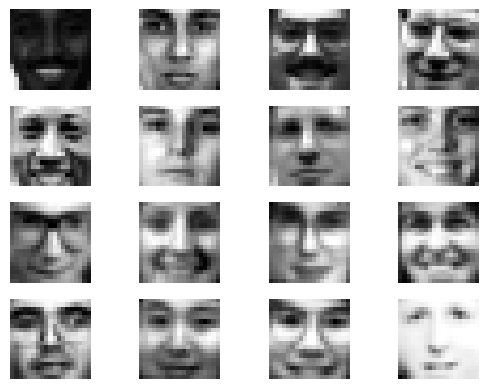

In [8]:
k_1 = int(k**0.5)
res = sorted(res, key = lambda elem: elem.sum())
fig, axs = plt.subplots(k_1, k_1)
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].imshow(res[i * k_1 + j].reshape(19,19), cmap='gray')
        axs[i][j].axis('off')

In [17]:
k = 10
Tmax = 10
M, Z = FW_kMeans_Version1(data.transpose(), k, Tmax)

(-0.5, 18.5, 18.5, -0.5)

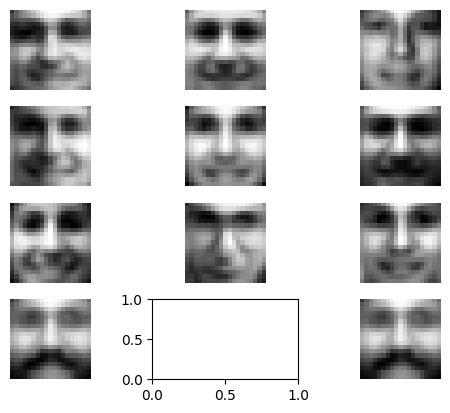

In [18]:
k_1 = int(9**0.5)
fig, axs = plt.subplots(4, 3)
for i in range(3):
    for j in range(3):
        axs[i][j].imshow(M[:, i*k_1 + j].reshape(19,19), cmap='gray')
        axs[i][j].axis('off')
axs[3][0].imshow(M[:, 9].reshape(19,19), cmap='gray')
axs[3][0].axis('off')
axs[3][2].imshow(M[:, 9].reshape(19,19), cmap='gray')
axs[3][2].axis('off')


# Task 5

In [52]:
import numpy as np
import time

def FW_update_Y(X, Y, Z, tmax):
    e = np.eye(Y.shape[0])

    # these matrices are constant, so we can precompute them
    # they are large, recomputing them every iteration takes a lot of time
    Xt_X = X.T @ X
    Z_Zt = Z @ Z.T
    Xt_X_Zt = X.T @ X @ Z.T

    for t in range(tmax):
        # Gy = 2 * (X.T @ X @ Y @ Z @ Z.T - X.T @ X @ Z.T)

        Gy = 2 * (Xt_X @ Y @ Z_Zt - Xt_X_Zt)

        imin = np.argmin(Gy, axis=0)
        Y += 2 / (t + 2) * (e[:, imin] - Y)
    return Y


def FW_kMeans_Version2(X, k, Tmax):

    time_start = time.time()

    # Randomly generate k centroids
    # b = X.max(axis=1).reshape(X.shape[0], 1).copy()
    # m = np.random.random((X.shape[0], k))
    # a = X.min(axis=1).reshape(X.shape[0], 1).copy()
    # M = (b-a) * m + a

    M = incremental_farthest_search(X.transpose(), k).transpose()

    for T in range(Tmax):
        Z = 1/k*np.ones((k, X.shape[1]))
        Z = FW_update_Z(X, M, Z, 1)

        Y = 1/X.shape[1] * np.ones((X.shape[1], k))
        Y = FW_update_Y(X, Y, Z, 100)

        M = X @ Y

        print(f'FW_kMeans_Version2: Iteration {T} is done, time elapsed: {time.time() - time_start:.2f} s')

    return M, Z

FW_kMeans_Version2: Iteration 0 is done, time elapsed: 0.02 s
FW_kMeans_Version2: Iteration 1 is done, time elapsed: 0.02 s
FW_kMeans_Version2: Iteration 2 is done, time elapsed: 0.02 s
FW_kMeans_Version2: Iteration 3 is done, time elapsed: 0.03 s
FW_kMeans_Version2: Iteration 4 is done, time elapsed: 0.03 s
FW_kMeans_Version2: Iteration 5 is done, time elapsed: 0.05 s
FW_kMeans_Version2: Iteration 6 is done, time elapsed: 0.06 s
FW_kMeans_Version2: Iteration 7 is done, time elapsed: 0.06 s
FW_kMeans_Version2: Iteration 8 is done, time elapsed: 0.06 s
FW_kMeans_Version2: Iteration 9 is done, time elapsed: 0.07 s


Text(0.5, 1.0, 'FW_kMeans_Version2')

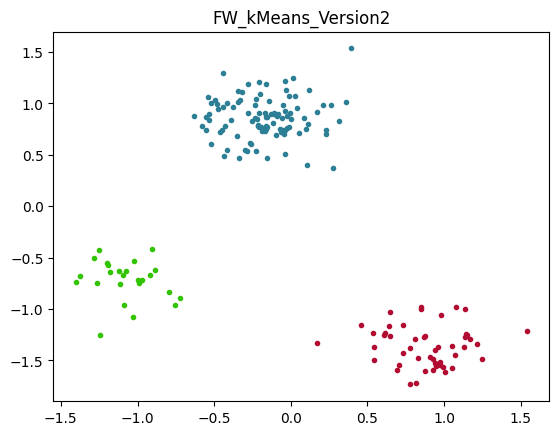

In [53]:
k = 3
M, Z = FW_kMeans_Version2(df, k, 10)
Zdf = pd.DataFrame(Z)

classes = (np.where(Zdf == 1.))
classes = classes[0][np.argsort(classes[1])]

# clr = ['blue', 'green', 'orange']

clr = []
for i in range(k):
    clr.append((random.random(), random.random(), random.random()))

for i in range(df.shape[1]):
    plt.plot(df[0][i], df[1][i], '.', color=clr[classes[i]])

plt.title('FW_kMeans_Version2')

FW_kMeans_Version2: Iteration 0 is done, time elapsed: 9.17 s
FW_kMeans_Version2: Iteration 1 is done, time elapsed: 17.93 s
FW_kMeans_Version2: Iteration 2 is done, time elapsed: 26.39 s
FW_kMeans_Version2: Iteration 3 is done, time elapsed: 34.86 s
FW_kMeans_Version2: Iteration 4 is done, time elapsed: 43.31 s
FW_kMeans_Version2: Iteration 5 is done, time elapsed: 51.76 s
FW_kMeans_Version2: Iteration 6 is done, time elapsed: 60.22 s
FW_kMeans_Version2: Iteration 7 is done, time elapsed: 68.68 s
FW_kMeans_Version2: Iteration 8 is done, time elapsed: 77.06 s
FW_kMeans_Version2: Iteration 9 is done, time elapsed: 85.94 s
FW_kMeans_Version2: Iteration 10 is done, time elapsed: 94.77 s
FW_kMeans_Version2: Iteration 11 is done, time elapsed: 103.16 s


(-0.5, 18.5, 18.5, -0.5)

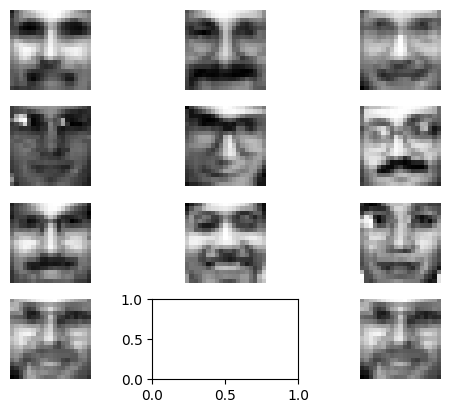

In [54]:
k = 10
Tmax = 12
M, Z = FW_kMeans_Version2(data.transpose(), k, Tmax)

k_1 = int(9 ** 0.5)
fig, axs = plt.subplots(4, 3)
for i in range(3):
    for j in range(3):
        axs[i][j].imshow(M[:, i * k_1 + j].reshape(19, 19), cmap='gray')
        axs[i][j].axis('off')
axs[3][0].imshow(M[:, 9].reshape(19, 19), cmap='gray')
axs[3][0].axis('off')
axs[3][2].imshow(M[:, 9].reshape(19, 19), cmap='gray')
axs[3][2].axis('off')